In [3]:
!pip install --upgrade quandl

#Introduction to Financial Python
##Rate of Return, Mean and Variance

##Introduction

In this chapter we are going to introduce some basic concepts in quantitative finance. We start with rate of return, mean and variance. You may think it's simple to calculate these values, however, there are number of different methods to calculate them. It's important to choose the appropriate calculation methods case by case.

##Rate of Return

**Single-period Return**
The single-period rate of return can be calculated as following:

\begin{equation}r=\frac{P_{t}}{p_{0}}-1= \frac{P_{t}-P_{0}}{P_{0}}
\end{equation}

Where $r$ is the rate of return, $P_{0}$ is the asset price at time $t$, and $P_{0}$ is the asset price at time $0$.

In [10]:
import numpy as np
rate_return = 102.0/100 - 1
print (rate_return)

0.020000000000000018


Let's say we bought a stock at $100, and half a year later it will grow to $102. A year later the price will come to $104. How to calculate our total return? Well, we can either deem it as a single-period:

$r=104/100−1=0.04$

or as a two-stage period:

$r=(1+r1)∗(1+r2)−1=\frac{102}{100}∗\frac{104}{102}−1=0.04$

Here we make calculations twice a year. It's called semi-annual compounding. How about quarterly compounding? Let's assume the stock prices at the end of each quarter are p1,p2,p3,p4 respectively.

$r=(1+r1)∗(1+r2)∗(1+r3)∗(1+r4)−1$

The rate of return we calculate here is called cumulative return or overall return. It measures the total return of this asset over a period of time.

Now consider the following situation: we have two strategies: strategy A and strategy B. We backtested strategy A for 1 years and the cumulative return is 20%, while we backtested strategy B for 3 months(one quarter) and the cumulative return is 6%. Which strategy has a high rate of return? Our commonly used method is to convert all the returns into compounding annual return, regardless of the investing horizon of each strategy. We can compare the returns of strategies with different time horizon now. Since there are four quarters in a year,the annual return of strategy B is

$\[(1+0.06)^{4}=1+r\]$

$r=0.262$

Strategy B has an higher compounding annual return when we compare 26% with 20%.

**Logarithm Return**

In the above example, strategy A has 6% return over three months. Nominally, the annual return would be 4*6% = 24%. This nominal annual interest rate is called the stated annual interest rate. It is calculated as the periodic interest rate times the number of periods per year. It works according to the simple interest and does not take into account the compounding periods, while the effective annual interest rate is 26% as we calculated above and it does account for intra-year compounding. The effective annual interest rate is an essential tool that allows the evaluation of the real return on investment. If we assume the number of compounding periods in one year is n, the formula to convert the stated annual interest rate to the effective annual interest rate is

$r_{effective}= (1+\frac{r_{nominal}}{n})^{n}-1$

where the second equality holds due to Taylor Expansion and the interest rate being small. This is frequently used when calculating returns, because once we take the logarithm of asset prices, we can calculate the logarithm return by simply doing a subtraction. Here we use Apple stock prices as an example:

In [11]:
import quandl
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'fvwpEw843bXEYxUMgoCv'
#get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table.loc['2017-3',['Open','Close']]
#take log return
aapl['log_price'] = np.log(aapl.Close)
aapl['log_return'] = aapl['log_price'].diff()
print (aapl)

               Open   Close  log_price  log_return
Date                                              
2017-03-01  137.890  139.79   4.940141         NaN
2017-03-02  140.000  138.96   4.934186   -0.005955
2017-03-03  138.780  139.78   4.940070    0.005884
2017-03-06  139.365  139.34   4.936917   -0.003153
2017-03-07  139.060  139.52   4.938208    0.001291
2017-03-08  138.950  139.00   4.934474   -0.003734
2017-03-09  138.740  138.68   4.932169   -0.002305
2017-03-10  139.250  139.14   4.935481    0.003311
2017-03-13  138.850  139.20   4.935912    0.000431
2017-03-14  139.300  138.99   4.934402   -0.001510
2017-03-15  139.410  140.46   4.944923    0.010521
2017-03-16  140.720  140.69   4.946559    0.001636
2017-03-17  141.000  139.99   4.941571   -0.004988
2017-03-20  140.400  141.46   4.952017    0.010446
2017-03-21  142.110  139.84   4.940499   -0.011518
2017-03-22  139.845  141.42   4.951734    0.011235
2017-03-23  141.260  140.92   4.948192   -0.003542
2017-03-24  141.500  140.64   4

Here we calculated the daily logarithmic return of Apple stock. Given that we know the daily logarithm return of in this month, we can calculate the monthly return by simply sum all the daily returns up.

In [12]:
month_return = aapl.log_return.sum()
print (month_return)

0.0273081001636184


It may sounds incorrect to sum up the daily returns, but we can prove that it's mathematically correct. Let's assume the stock prices in a period of time are represented by [p0,p1,p2,p3.....pn]. Then the cumulative rate of return is given by:



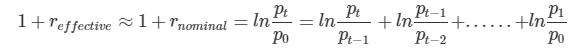

According to the equation above, we can simple sum up each logarithmic return in a period to get the cumulative return. The convenience of this method is also one of the reasons why we use logarithmic return in quantitative finance.

##Mean

**Arithmetic Mean**

Mean is a measure of the central tendency of a data series. It capture the key character of the distribution of the data series. When we talk about mean, by default it refers to arithmetic mean. It's defined as the sum of the values divided by the number of observations:

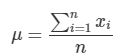

Where $(x1,x2,x3.....xn)$ is our data series.

In python we can use NumPy.mean() to do the calculation:

In [13]:
print (np.mean(aapl.log_price))

4.94597446550658


The geometric mean is an average that is useful for data series of positive numbers that are better interpreted according to their product, such as growth rate. It's calculated by:

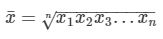

Let's calculate the geometric mean of a series of single-period return:

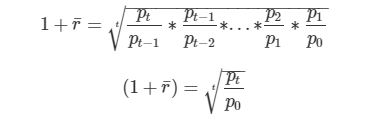

Now the equation becomes the form which we are familiar with:

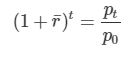

This is why we said it make sense when applied to growth rates.

##Variance and Standard Deviation

**Variance**
Variance is a measure of dispersion. In finance, most of the time variance is a synonym for risk. The higher the variance of an asset price is, the higher risk the asset bears. Variance is usually represented by σ2, and it's calculated by

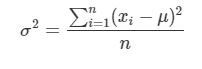

In python we can use NumPy.var to calculate it:

In [14]:
print (np.var(aapl.log_price))

0.00014203280448152512


**Standard Deviation**
The most commonly used measure of dispersion in finance is standard deviation. It's usually represented by σ. It's obvious to see the relation between standard deviation and variance:

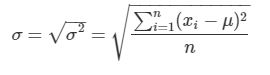

NumPy also provides us a method to calculate standard deviation.

In [15]:
print (np.std(aapl.log_price))

0.011917751653794651


##Summary

We introduced different types of rate of return in this chapter, which could be a little bit tricky when we calculate them. Mean and standard deviation are also very important concepts when we conduct hypothesis test or measure the risk associated with a asset. We will use those concepts intensively in our later chapter.